# Discretization

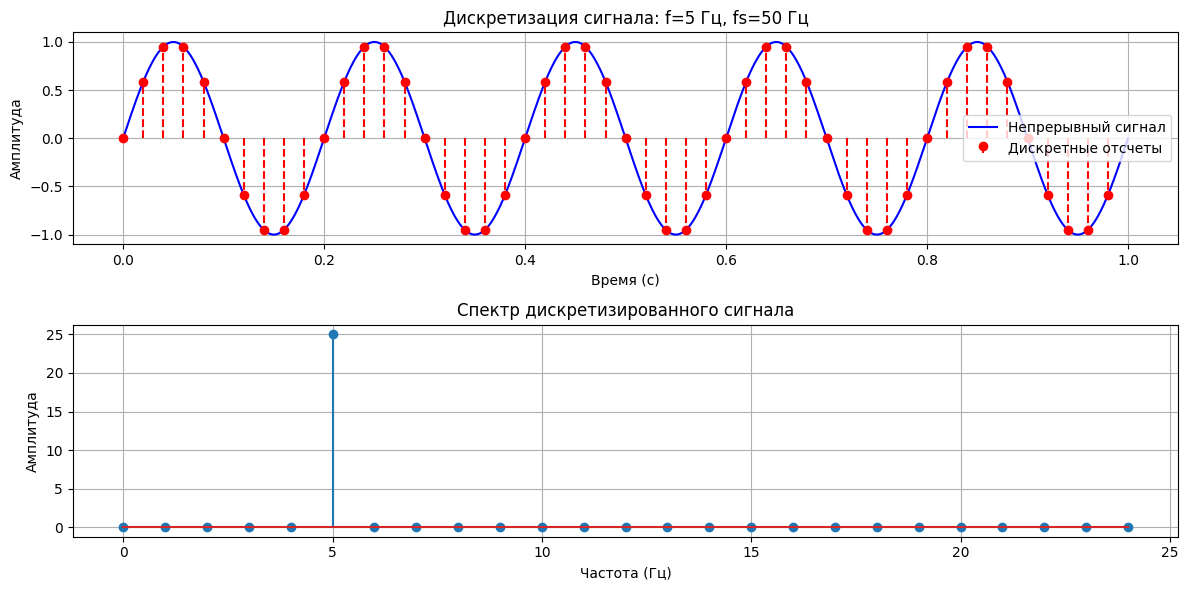

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
frequency = 5  # частота сигнала в Гц
amplitude = 1  # амплитуда
duration = 1   # длительность в секундах

# Частота дискретизации
fs = 50  # частота дискретизации в Гц
Ts = 1/fs  # период дискретизации

# Непрерывное время для визуализации
t_continuous = np.linspace(0, duration, 1000)
signal_continuous = amplitude * np.sin(2 * np.pi * frequency * t_continuous)

# Дискретное время
n_samples = int(fs * duration)
t_discrete = np.arange(0, duration, Ts)
signal_discrete = amplitude * np.sin(2 * np.pi * frequency * t_discrete)

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuous, signal_continuous, 'b-', label='Непрерывный сигнал')
plt.stem(t_discrete, signal_discrete, 'r', markerfmt='ro', basefmt=' ', linefmt='r--', label='Дискретные отсчеты')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title(f'Дискретизация сигнала: f={frequency} Гц, fs={fs} Гц')
plt.legend()
plt.grid(True)

# Спектр
plt.subplot(2, 1, 2)
fft_result = np.fft.fft(signal_discrete)
freqs = np.fft.fftfreq(len(signal_discrete), Ts)
plt.stem(freqs[:len(freqs)//2], np.abs(fft_result[:len(fft_result)//2]))
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр дискретизированного сигнала')
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
def sample_signal(signal_func, fs, duration, t_start=0):
    """
    Дискретизация сигнала

    Parameters:
    signal_func: функция сигнала f(t)
    fs: частота дискретизации (Гц)
    duration: длительность (с)
    t_start: начальное время

    Returns:
    t_samples: моменты дискретизации
    signal_samples: значения сигнала
    """
    Ts = 1/fs
    n_samples = int(fs * duration)
    t_samples = np.linspace(t_start, t_start + duration, n_samples, endpoint=False)
    signal_samples = signal_func(t_samples)

    return t_samples, signal_samples

# Пример использования
def my_signal(t):
    return 0.5 * np.sin(2 * np.pi * 10 * t) + 0.3 * np.sin(2 * np.pi * 25 * t)

fs = 100  # частота дискретизации должна быть > 50 Гц (по Найквисту)
t_samples, samples = sample_signal(my_signal, fs, 1)

# Проверка критерия Найквиста
def check_nyquist(fs, max_freq):
    """Проверка выполнения критерия Найквиста"""
    nyquist_freq = fs / 2
    if max_freq <= nyquist_freq:
        print(f"Критерий Найквиста выполнен: {max_freq} Гц <= {nyquist_freq} Гц")
        return True
    else:
        print(f"Предупреждение: возможен эффект наложения! {max_freq} Гц > {nyquist_freq} Гц")
        return False

check_nyquist(fs, 25)  # максимальная частота в сигнале 25 Гц

Критерий Найквиста выполнен: 25 Гц <= 50.0 Гц


True

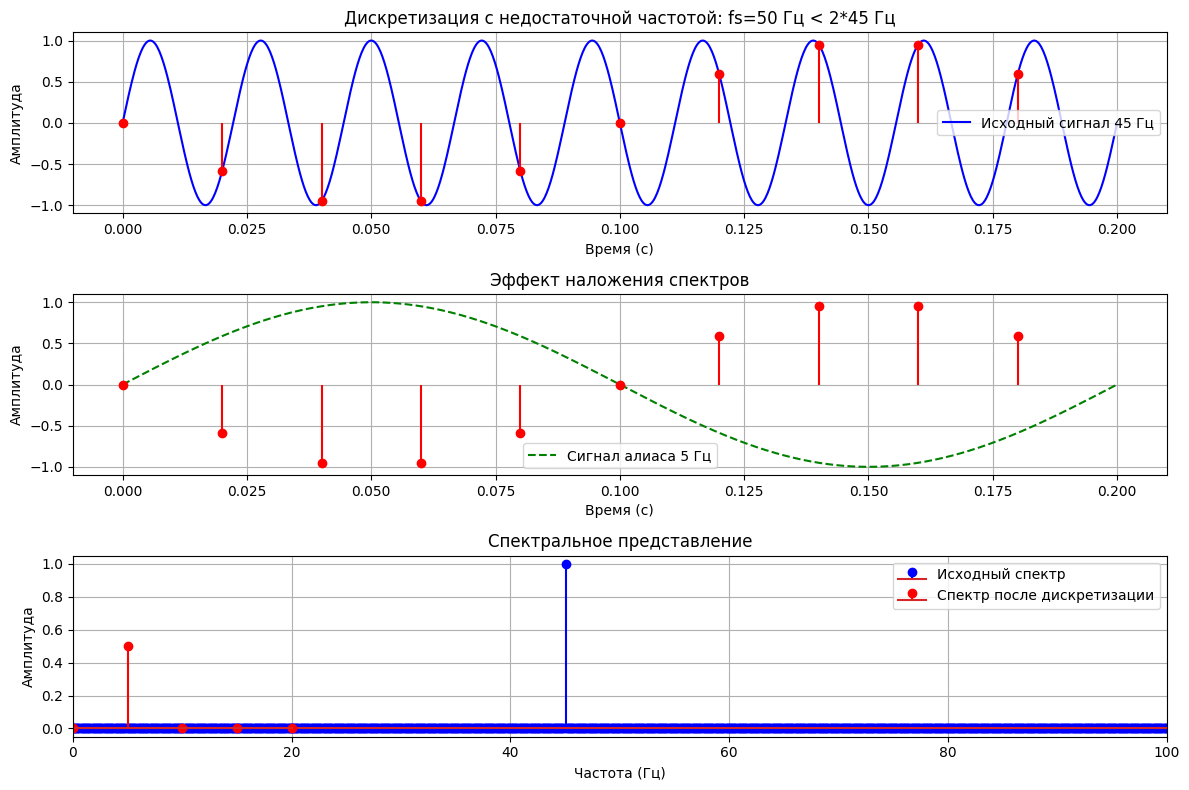

In [3]:
def demonstrate_aliasing():
    """Демонстрация эффекта наложения спектров"""
    # Сигнал с высокой частотой
    f_high = 45  # Гц
    fs = 50      # недостаточная частота дискретизации

    t = np.linspace(0, 0.2, 1000)
    signal = np.sin(2 * np.pi * f_high * t)

    # Дискретизация
    t_samples = np.arange(0, 0.2, 1/fs)
    signal_samples = np.sin(2 * np.pi * f_high * t_samples)

    # Кажущийся низкочастотный сигнал из-за алиасинга
    f_alias = abs(fs - f_high)  # частота алиаса
    signal_alias = np.sin(2 * np.pi * f_alias * t)

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, signal, 'b-', label=f'Исходный сигнал {f_high} Гц')
    plt.stem(t_samples, signal_samples, 'r', basefmt=' ')
    plt.xlabel('Время (с)')
    plt.ylabel('Амплитуда')
    plt.title(f'Дискретизация с недостаточной частотой: fs={fs} Гц < 2*{f_high} Гц')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(t, signal_alias, 'g--', label=f'Сигнал алиаса {f_alias} Гц')
    plt.stem(t_samples, signal_samples, 'r', basefmt=' ')
    plt.xlabel('Время (с)')
    plt.ylabel('Амплитуда')
    plt.title('Эффект наложения спектров')
    plt.legend()
    plt.grid(True)

    # Спектры
    plt.subplot(3, 1, 3)
    from scipy.fft import fft, fftfreq

    # Спектр непрерывного сигнала (имитация)
    f_continuous = np.linspace(0, 100, 1000)
    spectrum_continuous = np.zeros_like(f_continuous)
    spectrum_continuous[np.argmin(np.abs(f_continuous - f_high))] = 1

    # Спектр дискретного сигнала
    spectrum_discrete = np.abs(fft(signal_samples))
    freqs_discrete = fftfreq(len(signal_samples), 1/fs)

    plt.stem(f_continuous, spectrum_continuous, 'b', markerfmt='bo', label='Исходный спектр')
    plt.stem(freqs_discrete, spectrum_discrete/len(signal_samples), 'r', markerfmt='ro', label='Спектр после дискретизации')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплитуда')
    plt.title('Спектральное представление')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 100)

    plt.tight_layout()
    plt.show()

demonstrate_aliasing()

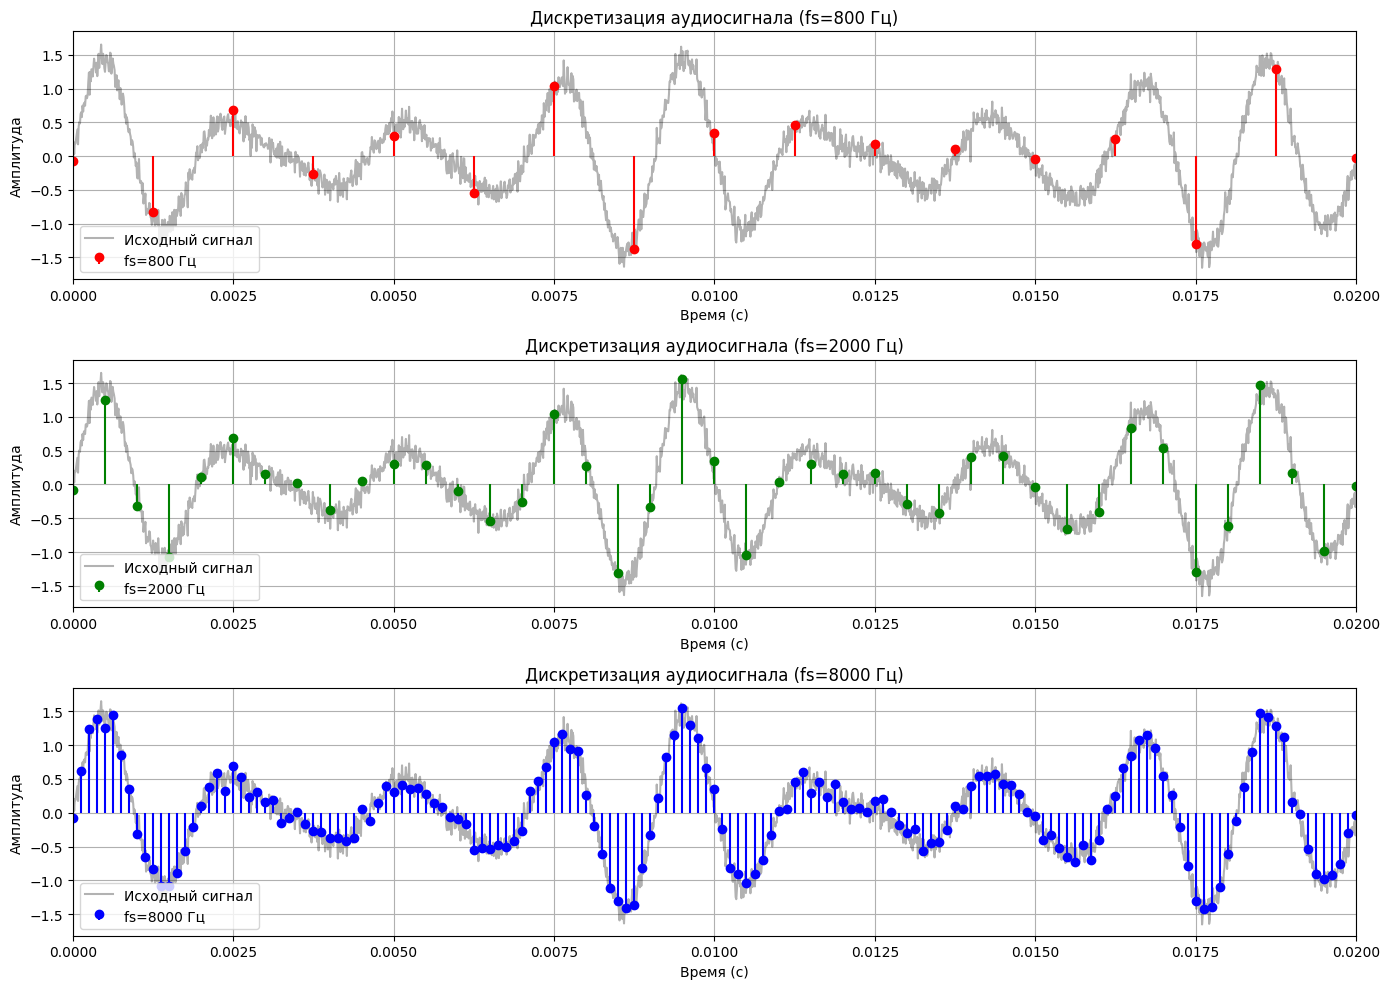

In [4]:
def practical_example():
    """Практический пример с аудиосигналом"""
    # Создаем аудиоподобный сигнал
    duration = 0.1  # 100 мс
    t = np.linspace(0, duration, 10000)

    # Сигнал с несколькими частотами
    signal = (0.7 * np.sin(2 * np.pi * 440 * t) +  # нота Ля (440 Гц)
              0.5 * np.sin(2 * np.pi * 554 * t) +  # нота До# (554 Гц)
              0.3 * np.sin(2 * np.pi * 659 * t) +  # нота Ми (659 Гц)
              0.1 * np.random.randn(len(t)))       # шум

    # Дискретизация с разными частотами
    fs_options = [800, 2000, 8000]  # разные частоты дискретизации
    colors = ['r', 'g', 'b']

    plt.figure(figsize=(14, 10))

    for i, fs in enumerate(fs_options):
        # Дискретизация
        Ts = 1/fs
        t_samples = np.arange(0, duration, Ts)
        indices = (t_samples * 10000 / duration).astype(int)
        signal_samples = signal[indices]

        # Визуализация
        plt.subplot(len(fs_options), 1, i+1)
        plt.plot(t, signal, 'k-', alpha=0.3, label='Исходный сигнал')
        plt.stem(t_samples, signal_samples, colors[i],
                markerfmt=f'{colors[i]}o', basefmt=' ',
                label=f'fs={fs} Гц')
        plt.xlabel('Время (с)')
        plt.ylabel('Амплитуда')
        plt.title(f'Дискретизация аудиосигнала (fs={fs} Гц)')
        plt.legend()
        plt.grid(True)
        plt.xlim(0, 0.02)  # первые 20 мс

    plt.tight_layout()
    plt.show()

practical_example()

# Qunatization

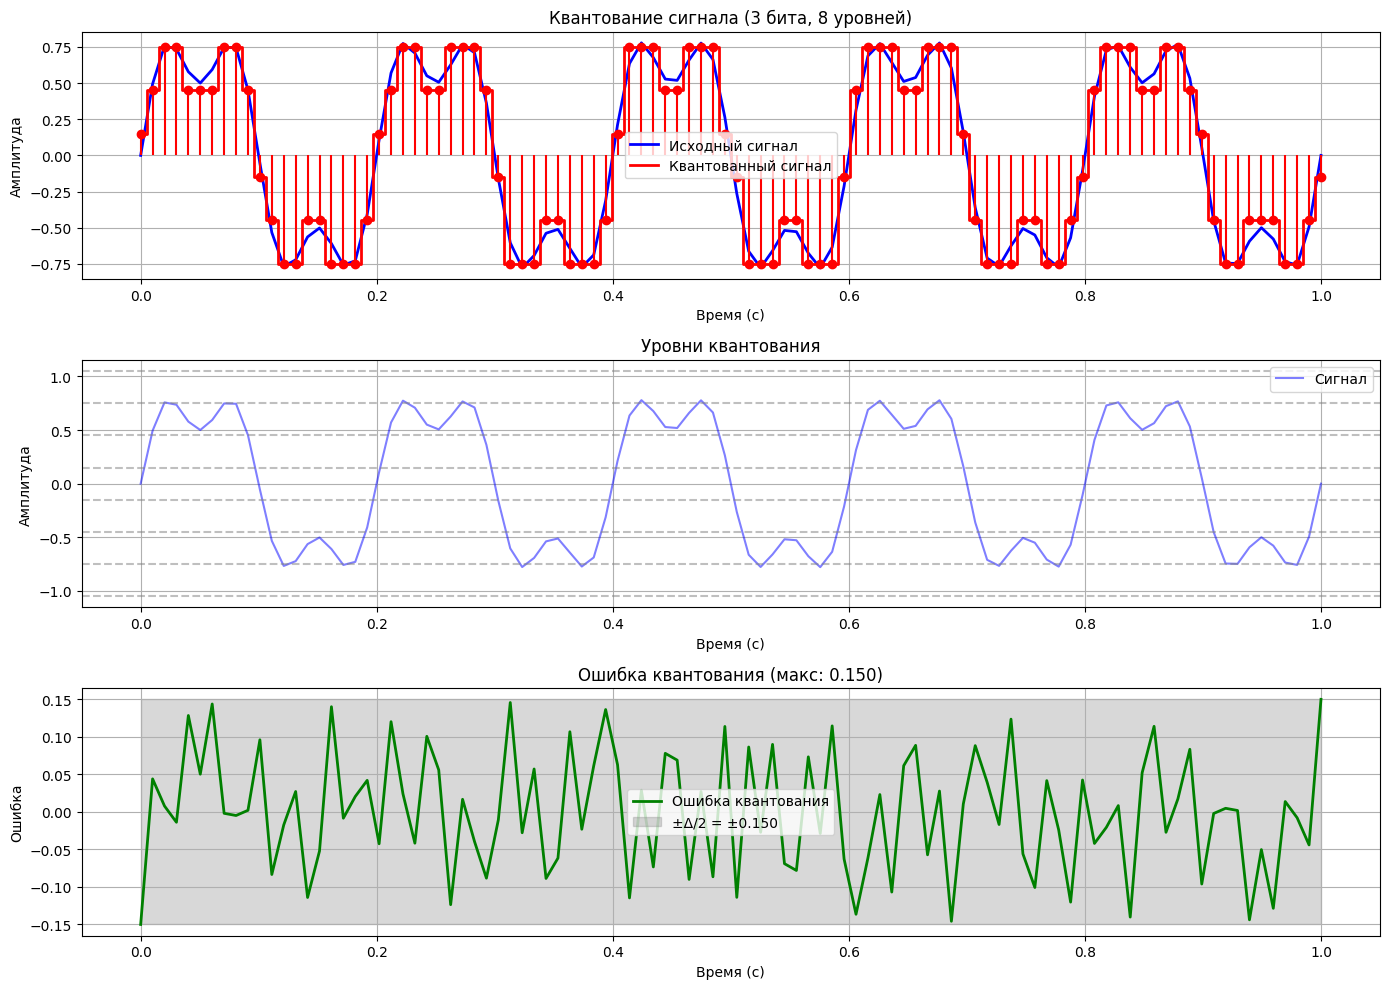

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def quantize_signal(samples, n_bits, v_min=-1, v_max=1):
    """
    Квантование сигнала

    Parameters:
    samples: аналоговые отсчеты
    n_bits: количество бит на отсчет
    v_min: минимальное напряжение
    v_max: максимальное напряжение

    Returns:
    quantized: квантованные значения
    levels: уровни квантования
    codes: коды (индексы уровней)
    """
    # Количество уровней квантования
    n_levels = 2 ** n_bits

    # Шаг квантования
    delta = (v_max - v_min) / n_levels

    # Уровни квантования
    levels = np.linspace(v_min + delta/2, v_max - delta/2, n_levels)

    # Пороги квантования
    thresholds = np.linspace(v_min, v_max, n_levels + 1)

    # Квантование
    quantized = np.zeros_like(samples)
    codes = np.zeros(len(samples), dtype=int)

    for i, sample in enumerate(samples):
        # Находим код (номер уровня)
        code = int((sample - v_min) / delta)
        code = max(0, min(n_levels - 1, code))  # ограничиваем диапазон
        codes[i] = code
        quantized[i] = levels[code]

    return quantized, levels, codes, delta

# Создадим тестовый сигнал
fs = 100
t = np.linspace(0, 1, fs)
signal = 0.8 * np.sin(2 * np.pi * 5 * t) + 0.3 * np.sin(2 * np.pi * 15 * t)

# Параметры квантования
n_bits = 3  # 8 уровней квантования
v_min, v_max = -1.2, 1.2  # динамический диапазон

# Квантование
quantized, levels, codes, delta = quantize_signal(signal, n_bits, v_min, v_max)

# Ошибка квантования
error = signal - quantized

# Визуализация
plt.figure(figsize=(14, 10))

# Исходный и квантованный сигналы
plt.subplot(3, 1, 1)
plt.plot(t, signal, 'b-', linewidth=2, label='Исходный сигнал')
plt.step(t, quantized, 'r-', where='mid', linewidth=2, label='Квантованный сигнал')
plt.stem(t, quantized, 'r', markerfmt='ro', basefmt=' ')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title(f'Квантование сигнала ({n_bits} бита, {2**n_bits} уровней)')
plt.legend()
plt.grid(True)

# Уровни квантования
plt.subplot(3, 1, 2)
plt.plot(t, signal, 'b-', alpha=0.5, label='Сигнал')
for level in levels:
    plt.axhline(y=level, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Уровни квантования')
plt.legend()
plt.grid(True)

# Ошибка квантования
plt.subplot(3, 1, 3)
plt.plot(t, error, 'g-', linewidth=2, label='Ошибка квантования')
plt.fill_between(t, -delta/2, delta/2, alpha=0.3, color='gray', label=f'±Δ/2 = ±{delta/2:.3f}')
plt.xlabel('Время (с)')
plt.ylabel('Ошибка')
plt.title(f'Ошибка квантования (макс: {np.max(np.abs(error)):.3f})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

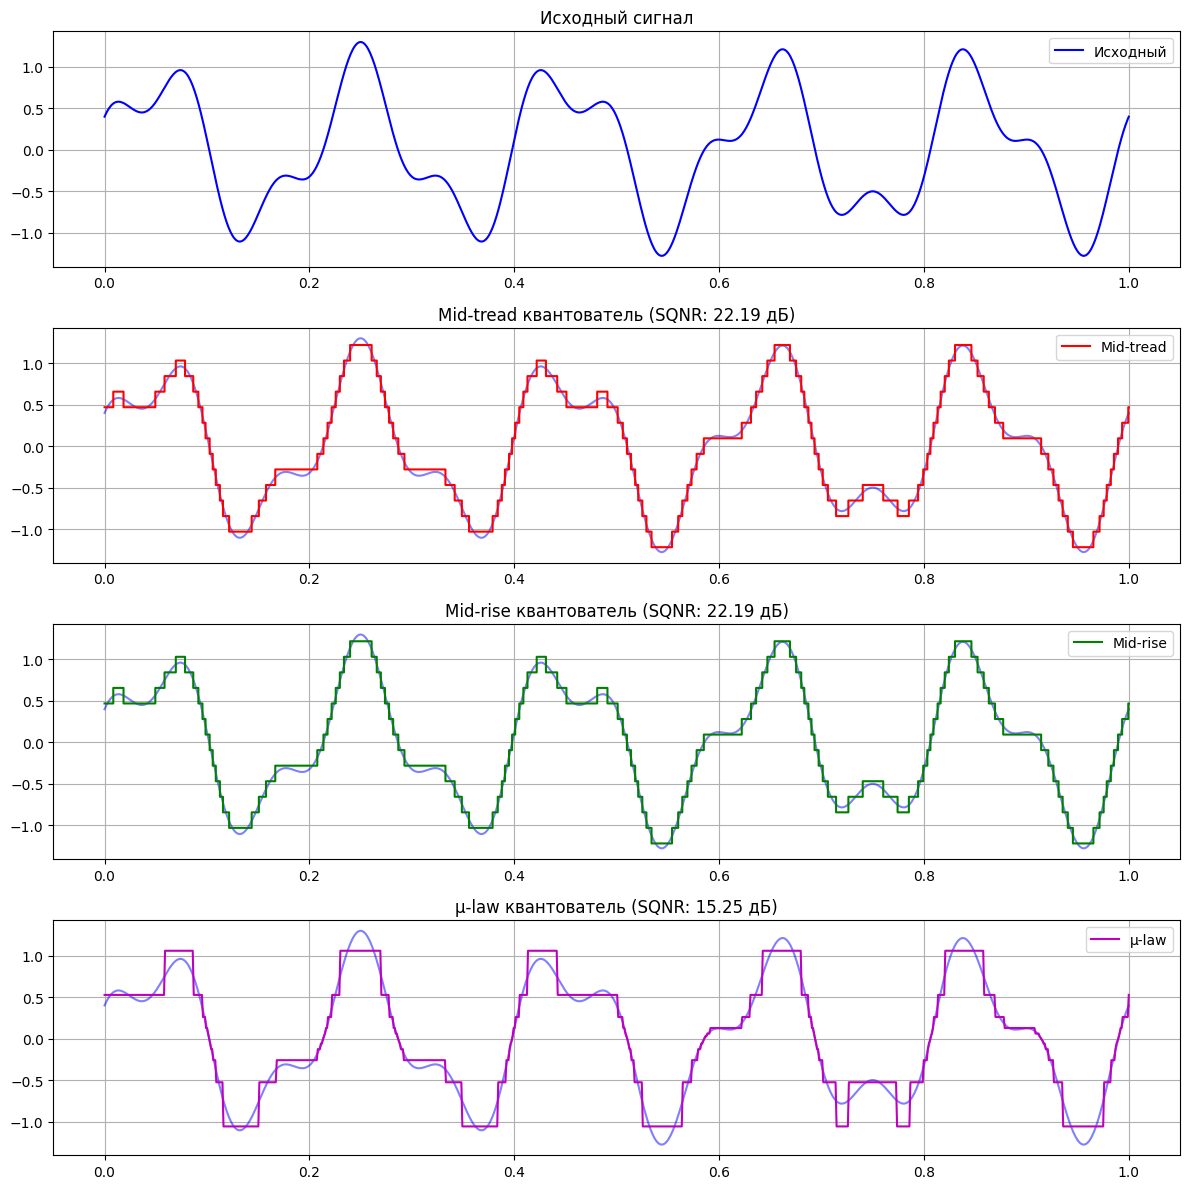

In [8]:
class Quantizer:
    """Класс для различных типов квантователей"""

    @staticmethod
    def uniform_midtread(samples, n_bits, v_min, v_max):
        """Равномерный квантователь с нулевым уровнем"""
        n_levels = 2 ** n_bits
        delta = (v_max - v_min) / n_levels
        levels = np.linspace(v_min + delta/2, v_max - delta/2, n_levels)

        # Квантование
        codes = np.floor((samples - v_min) / delta).astype(int)
        codes = np.clip(codes, 0, n_levels - 1)
        quantized = levels[codes]

        return quantized, codes, delta

    @staticmethod
    def uniform_midrise(samples, n_bits, v_min, v_max):
        """Равномерный квантователь без нулевого уровня"""
        n_levels = 2 ** n_bits
        delta = (v_max - v_min) / n_levels
        levels = np.linspace(v_min, v_max, n_levels + 1)[1:] - delta/2

        # Квантование
        codes = np.floor((samples - v_min) / delta).astype(int)
        codes = np.clip(codes, 0, n_levels - 1)
        quantized = levels[codes]

        return quantized, codes, delta

    @staticmethod
    def non_uniform_mu_law(samples, n_bits, mu=255, v_max=1):
        """Неравномерный квантователь по μ-закону (для аудио)"""
        # Компрессия
        samples_norm = samples / v_max
        compressed = np.sign(samples_norm) * (np.log(1 + mu * np.abs(samples_norm)) / np.log(1 + mu))

        # Равномерное квантование
        quantized_comp, codes, _ = Quantizer.uniform_midtread(compressed, n_bits, -1, 1)

        # Экспансия
        expanded = np.sign(quantized_comp) * (1/mu) * ((1 + mu) ** np.abs(quantized_comp) - 1)
        quantized = expanded * v_max

        return quantized, codes

    @staticmethod
    def calculate_sqnr(original, quantized):
        """Расчет SQNR (Signal-to-Quantization-Noise Ratio)"""
        signal_power = np.mean(original ** 2)
        noise_power = np.mean((original - quantized) ** 2)

        if noise_power == 0:
            return np.inf

        sqnr_db = 10 * np.log10(signal_power / noise_power)
        return sqnr_db

# Сравнение разных квантователей
def compare_quantizers():
    # Тестовый сигнал
    t = np.linspace(0, 1, 1000)
    signal = 0.9 * np.sin(2 * np.pi * 5 * t) + 0.4 * np.cos(2 * np.pi * 12 * t)

    # Параметры
    n_bits = 4
    v_min, v_max = -1.5, 1.5

    # Применяем разные квантователи
    q_midtread, codes_mt, delta_mt = Quantizer.uniform_midtread(signal, n_bits, v_min, v_max)
    q_midrise, codes_mr, delta_mr = Quantizer.uniform_midrise(signal, n_bits, v_min, v_max)
    q_mulaw, codes_mu = Quantizer.non_uniform_mu_law(signal, n_bits, mu=255, v_max=v_max)

    # Визуализация
    fig, axes = plt.subplots(4, 1, figsize=(12, 12))

    axes[0].plot(t, signal, 'b-', label='Исходный')
    axes[0].set_title('Исходный сигнал')
    axes[0].grid(True)
    axes[0].legend()

    axes[1].plot(t, signal, 'b-', alpha=0.5)
    axes[1].step(t, q_midtread, 'r-', where='mid', label='Mid-tread')
    axes[1].set_title(f'Mid-tread квантователь (SQNR: {Quantizer.calculate_sqnr(signal, q_midtread):.2f} дБ)')
    axes[1].grid(True)
    axes[1].legend()

    axes[2].plot(t, signal, 'b-', alpha=0.5)
    axes[2].step(t, q_midrise, 'g-', where='mid', label='Mid-rise')
    axes[2].set_title(f'Mid-rise квантователь (SQNR: {Quantizer.calculate_sqnr(signal, q_midrise):.2f} дБ)')
    axes[2].grid(True)
    axes[2].legend()

    axes[3].plot(t, signal, 'b-', alpha=0.5)
    axes[3].plot(t, q_mulaw, 'm-', label='μ-law')
    axes[3].set_title(f'μ-law квантователь (SQNR: {Quantizer.calculate_sqnr(signal, q_mulaw):.2f} дБ)')
    axes[3].grid(True)
    axes[3].legend()

    plt.tight_layout()
    plt.show()

    return
    # return q_midtread, q_midrise, q_mulaw

compare_quantizers()

# ADC

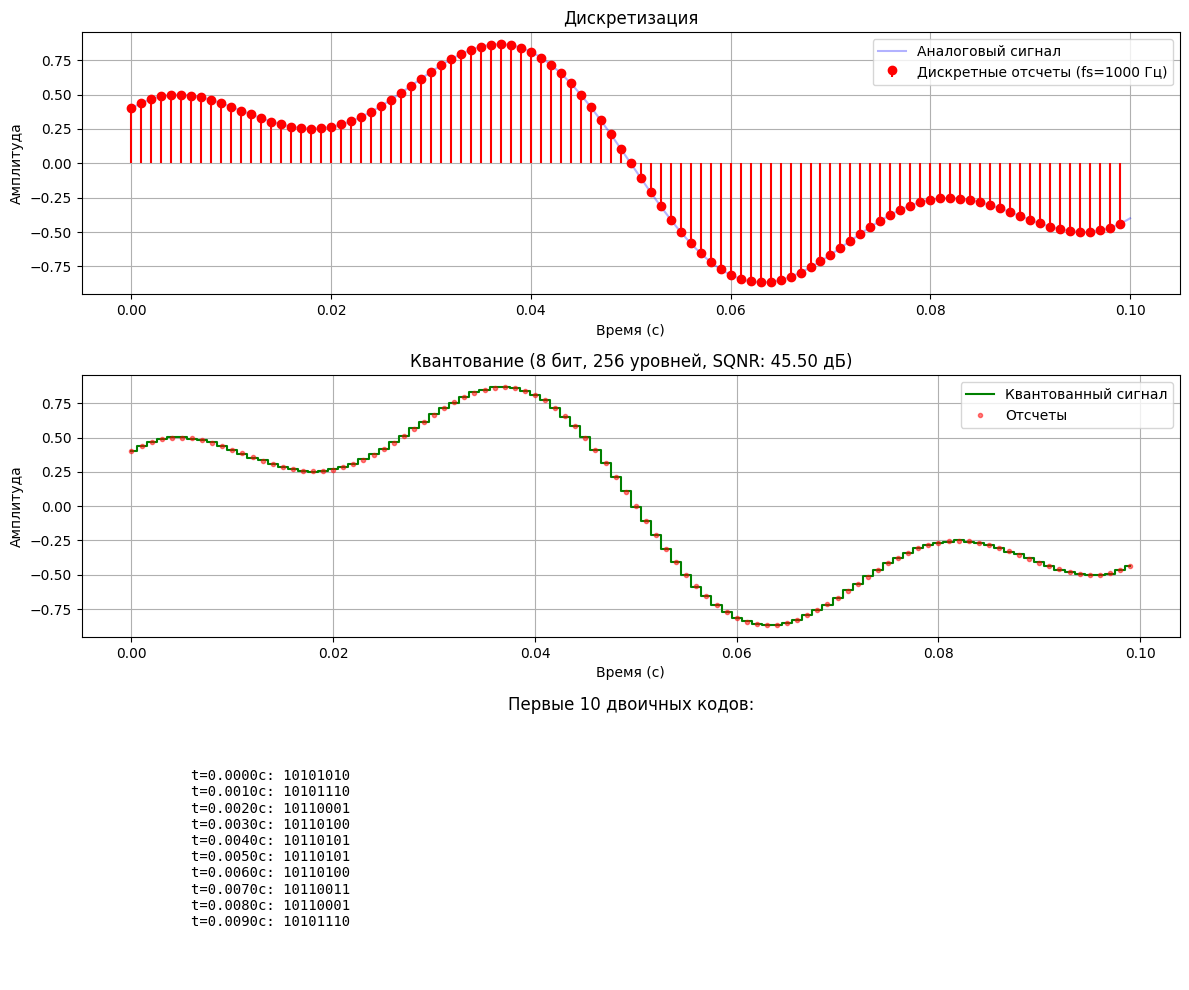

Разрядность АЦП: 8 бит
Частота дискретизации: 1000 Гц
Количество уровней квантования: 256
Шаг квантования: 0.009375
SQNR: 45.50 дБ
Теоретический SQNR для 8-битного АЦП: 49.92 дБ


In [9]:
class ADC:
    """Модель аналого-цифрового преобразователя"""

    def __init__(self, fs, n_bits, v_min=-1, v_max=1, quantizer_type='midtread'):
        self.fs = fs  # частота дискретизации
        self.n_bits = n_bits  # разрядность
        self.v_min = v_min
        self.v_max = v_max
        self.quantizer_type = quantizer_type
        self.n_levels = 2 ** n_bits
        self.delta = (v_max - v_min) / self.n_levels

    def sample(self, t, analog_signal):
        """Дискретизация по времени"""
        # Антиалиасинговая фильтрация (упрощенная)
        # В реальности здесь был бы фильтр нижних частот
        samples = analog_signal(t)
        return samples

    def quantize(self, samples):
        """Квантование по амплитуде"""
        if self.quantizer_type == 'midtread':
            return Quantizer.uniform_midtread(samples, self.n_bits, self.v_min, self.v_max)
        elif self.quantizer_type == 'midrise':
            return Quantizer.uniform_midrise(samples, self.n_bits, self.v_min, self.v_max)
        elif self.quantizer_type == 'mulaw':
            return Quantizer.non_uniform_mu_law(samples, self.n_bits, v_max=self.v_max)
        else:
            raise ValueError(f"Неизвестный тип квантователя: {self.quantizer_type}")

    def encode(self, codes):
        """Кодирование в двоичный код"""
        binary_codes = []
        for code in codes:
            # Преобразуем в двоичное представление с ведущими нулями
            binary = format(code, f'0{self.n_bits}b')
            binary_codes.append(binary)
        return binary_codes

    def process(self, t, analog_signal):
        """Полный процесс АЦП"""
        # 1. Дискретизация
        samples = self.sample(t, analog_signal)

        # 2. Квантование
        quantized, codes, _ = self.quantize(samples)

        # 3. Кодирование
        binary_codes = self.encode(codes)

        return {
            'time': t,
            'samples': samples,
            'quantized': quantized,
            'codes': codes,
            'binary': binary_codes,
            'sqnr': Quantizer.calculate_sqnr(samples, quantized)
        }

# Пример использования полного АЦП
def full_adc_pipeline():
    # Создаем аналоговый сигнал
    def analog_signal(t):
        return 0.7 * np.sin(2 * np.pi * 10 * t) + 0.4 * np.cos(2 * np.pi * 25 * t)

    # Параметры
    duration = 0.1  # 100 мс
    fs = 1000  # частота дискретизации 1 кГц
    n_bits = 8  # 8-битный АЦП

    # Создаем АЦП
    adc = ADC(fs=fs, n_bits=n_bits, v_min=-1.2, v_max=1.2, quantizer_type='midtread')

    # Время дискретизации
    t_samples = np.arange(0, duration, 1/fs)

    # Обработка сигнала
    result = adc.process(t_samples, analog_signal)

    # Визуализация
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))

    # Аналоговый сигнал и дискретные отсчеты
    t_analog = np.linspace(0, duration, 5000)
    axes[0].plot(t_analog, analog_signal(t_analog), 'b-', alpha=0.3, label='Аналоговый сигнал')
    axes[0].stem(t_samples, result['samples'], 'r', markerfmt='ro',
                basefmt=' ', label=f'Дискретные отсчеты (fs={fs} Гц)')
    axes[0].set_xlabel('Время (с)')
    axes[0].set_ylabel('Амплитуда')
    axes[0].set_title('Дискретизация')
    axes[0].legend()
    axes[0].grid(True)

    # Квантованный сигнал
    axes[1].step(t_samples, result['quantized'], 'g-', where='mid',
                label='Квантованный сигнал')
    axes[1].plot(t_samples, result['samples'], 'r.', alpha=0.5, label='Отсчеты')
    axes[1].set_xlabel('Время (с)')
    axes[1].set_ylabel('Амплитуда')
    axes[1].set_title(f'Квантование ({n_bits} бит, {2**n_bits} уровней, SQNR: {result["sqnr"]:.2f} дБ)')
    axes[1].legend()
    axes[1].grid(True)

    # Двоичные коды (первые 10 отсчетов)
    axes[2].axis('off')
    axes[2].set_title('Первые 10 двоичных кодов:')

    codes_text = '\n'.join([f't={t_samples[i]:.4f}с: {code}'
                           for i, code in enumerate(result['binary'][:10])])
    axes[2].text(0.1, 0.5, codes_text, fontfamily='monospace', fontsize=10,
                verticalalignment='center')

    plt.tight_layout()
    plt.show()

    # Вывод информации
    print(f"Разрядность АЦП: {n_bits} бит")
    print(f"Частота дискретизации: {fs} Гц")
    print(f"Количество уровней квантования: {2**n_bits}")
    print(f"Шаг квантования: {adc.delta:.6f}")
    print(f"SQNR: {result['sqnr']:.2f} дБ")
    print(f"Теоретический SQNR для {n_bits}-битного АЦП: {6.02 * n_bits + 1.76:.2f} дБ")

    return result

result = full_adc_pipeline()

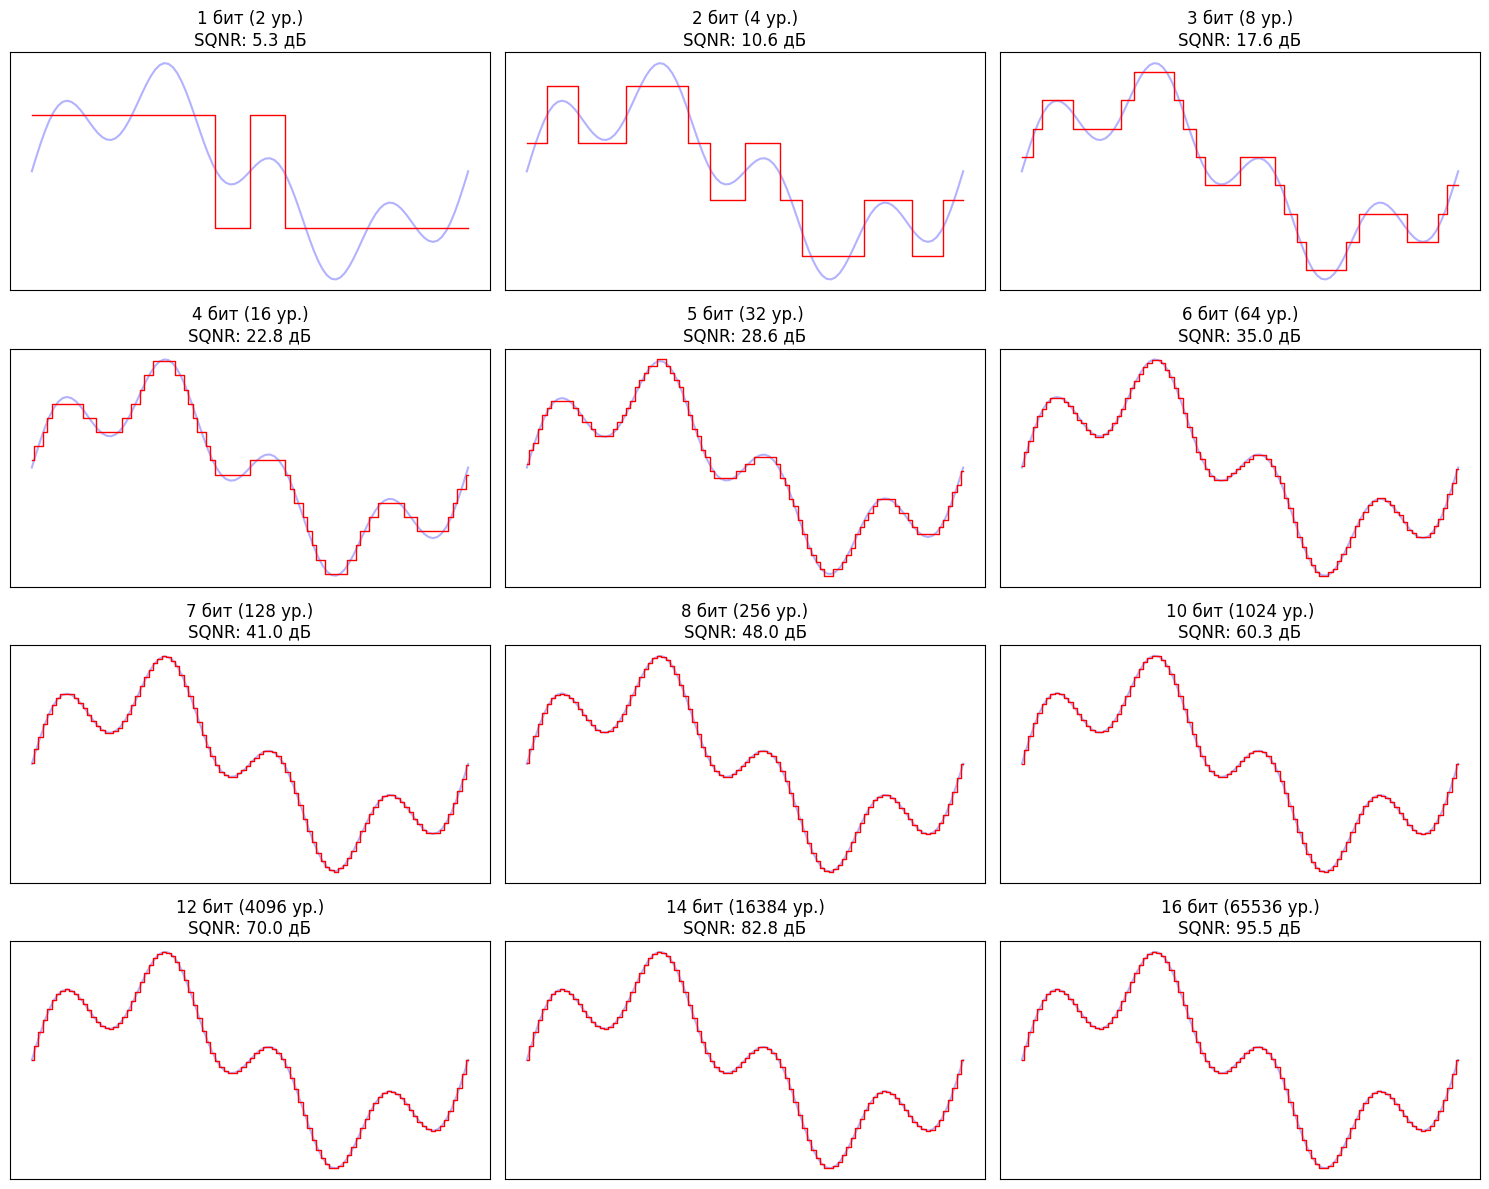

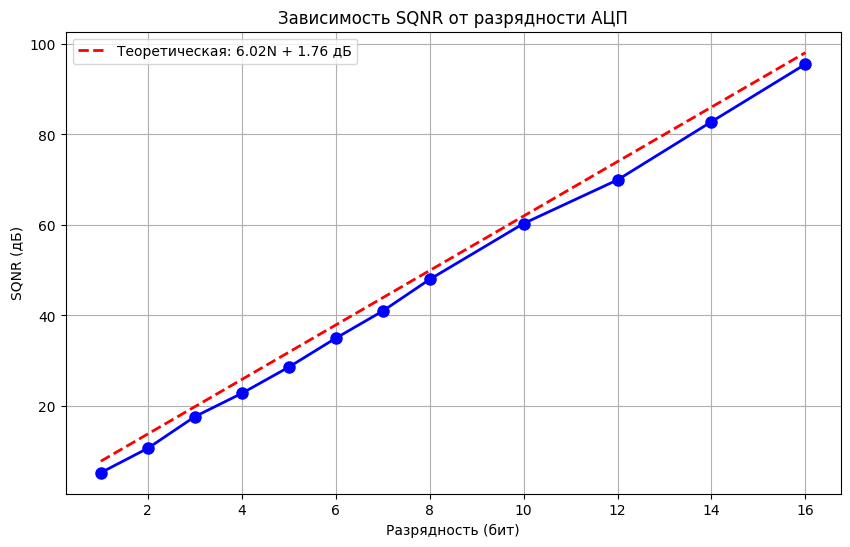

([1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16],
 [np.float64(5.2528866295911945),
  np.float64(10.6344359802549),
  np.float64(17.626449848810143),
  np.float64(22.774566733792234),
  np.float64(28.56923725059118),
  np.float64(34.960878478446546),
  np.float64(40.95811679607991),
  np.float64(47.96665451449468),
  np.float64(60.313656596780724),
  np.float64(69.95341288253479),
  np.float64(82.8105741604993),
  np.float64(95.5298079535684)])

In [10]:
def analyze_bit_depth_impact():
    """Анализ влияния разрядности АЦП на качество сигнала"""

    def test_signal(t):
        return np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)

    duration = 0.2
    fs = 500
    t = np.linspace(0, duration, int(fs * duration))
    signal = test_signal(t)

    # Разные разрядности
    bit_depths = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16]
    sqnr_values = []

    fig, axes = plt.subplots(4, 3, figsize=(15, 12))
    axes = axes.flatten()

    for idx, n_bits in enumerate(bit_depths):
        adc = ADC(fs=fs, n_bits=n_bits, v_min=-1.5, v_max=1.5)
        result = adc.process(t, lambda t: test_signal(t))

        # Вычисляем SQNR
        sqnr = Quantizer.calculate_sqnr(signal, result['quantized'])
        sqnr_values.append(sqnr)

        # Визуализация для некоторых разрядностей
        if idx < len(axes):
            ax = axes[idx]
            ax.plot(t, signal, 'b-', alpha=0.3, label='Исходный')
            ax.step(t, result['quantized'], 'r-', where='mid', linewidth=1)
            ax.set_title(f'{n_bits} бит ({2**n_bits} ур.)\nSQNR: {sqnr:.1f} дБ')
            ax.grid(True, alpha=0.3)
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    plt.show()

    # График SQNR от разрядности
    plt.figure(figsize=(10, 6))
    plt.plot(bit_depths, sqnr_values, 'bo-', linewidth=2, markersize=8)

    # Теоретическая зависимость SQNR = 6.02N + 1.76 дБ
    theoretical = [6.02 * n + 1.76 for n in bit_depths]
    plt.plot(bit_depths, theoretical, 'r--', linewidth=2, label='Теоретическая: 6.02N + 1.76 дБ')

    plt.xlabel('Разрядность (бит)')
    plt.ylabel('SQNR (дБ)')
    plt.title('Зависимость SQNR от разрядности АЦП')
    plt.grid(True)
    plt.legend()
    plt.show()

    return bit_depths, sqnr_values

analyze_bit_depth_impact()

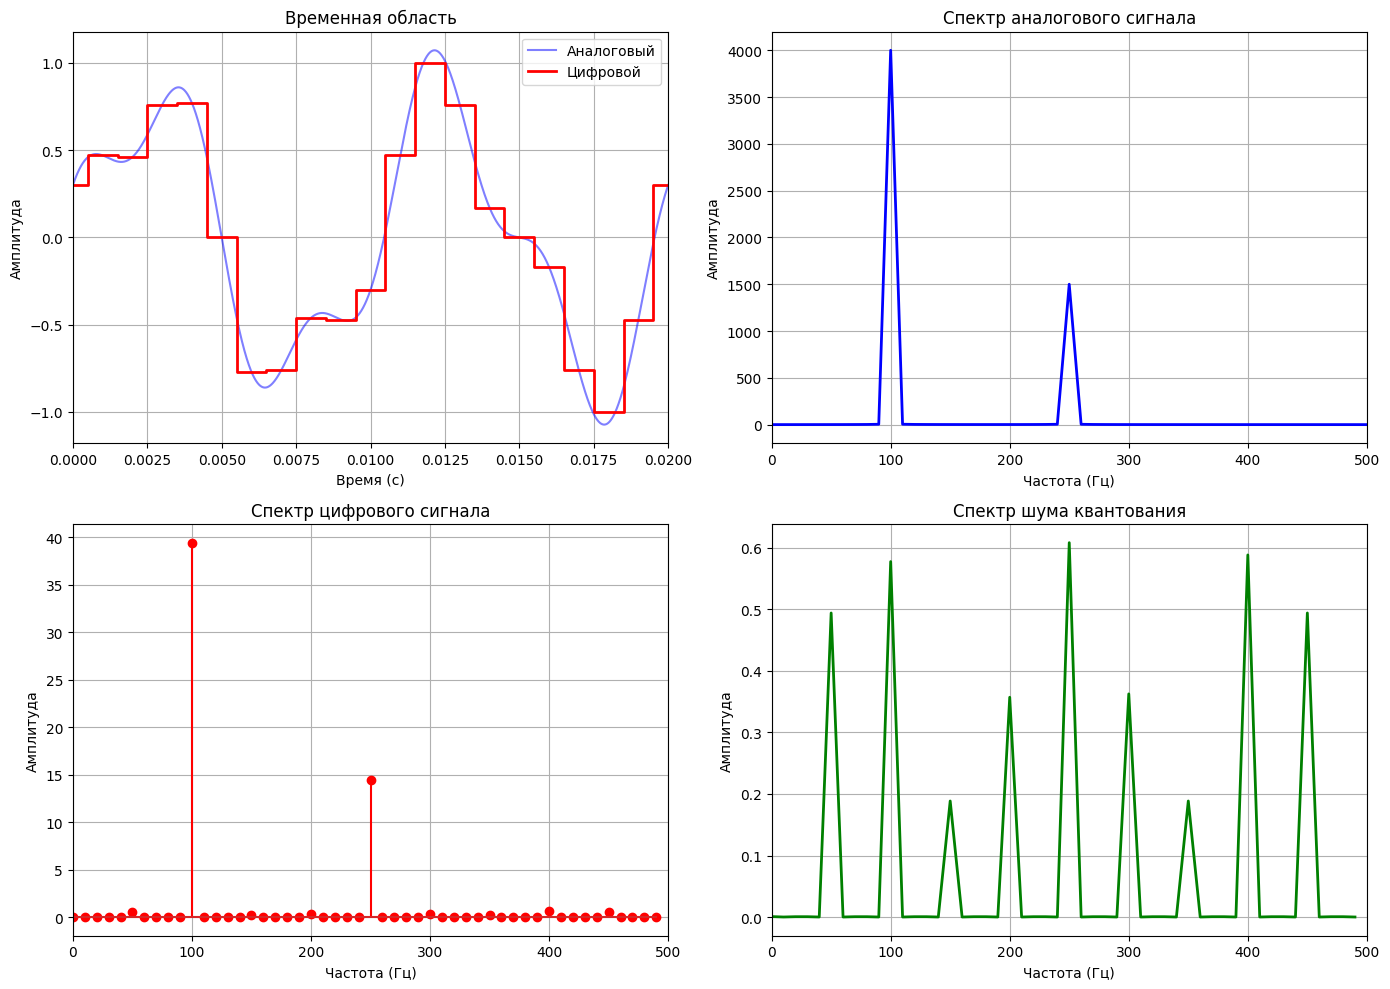

=== Статистика цифрового сигнала ===
Частота дискретизации: 1000 Гц
Разрядность: 12 бит
Количество отсчетов: 100
Динамический диапазон: [-1, 1]
Шаг квантования: 0.000488
Средняя мощность сигнала: 0.365000
Средняя мощность шума квантования: 0.000373
SQNR: 29.90 дБ

Примеры двоичных кодов (первые 5 отсчетов):
t=0.0000с: 101001100110
t=0.0010с: 101111000011
t=0.0020с: 101110101111
t=0.0030с: 111000010110
t=0.0040с: 111000101001


In [11]:
def digital_signal_analysis():
    """Анализ полностью цифрового сигнала"""

    # Создаем АЦП
    adc = ADC(fs=1000, n_bits=12, v_min=-1, v_max=1)

    # Исходный сигнал
    t = np.linspace(0, 0.1, 10000)  # для аналогового представления
    analog = 0.8 * np.sin(2 * np.pi * 100 * t) + 0.3 * np.cos(2 * np.pi * 250 * t)

    # Дискретные моменты времени
    t_digital = np.arange(0, 0.1, 1/adc.fs)

    # Полный АЦП процесс
    result = adc.process(t_digital, lambda t: 0.8*np.sin(2*np.pi*100*t) + 0.3*np.cos(2*np.pi*250*t))

    # Анализ спектров
    from scipy.fft import fft, fftfreq

    # Спектр аналогового сигнала
    fft_analog = fft(analog)
    freqs_analog = fftfreq(len(analog), t[1]-t[0])

    # Спектр цифрового сигнала
    fft_digital = fft(result['quantized'])
    freqs_digital = fftfreq(len(result['quantized']), 1/adc.fs)

    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Временная область
    axes[0, 0].plot(t, analog, 'b-', alpha=0.5, label='Аналоговый')
    axes[0, 0].step(t_digital, result['quantized'], 'r-', where='mid',
                   linewidth=2, label='Цифровой')
    axes[0, 0].set_xlabel('Время (с)')
    axes[0, 0].set_ylabel('Амплитуда')
    axes[0, 0].set_title('Временная область')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].set_xlim(0, 0.02)

    # Спектр аналогового
    axes[0, 1].plot(freqs_analog[:len(freqs_analog)//2],
                   np.abs(fft_analog[:len(fft_analog)//2]),
                   'b-', linewidth=2)
    axes[0, 1].set_xlabel('Частота (Гц)')
    axes[0, 1].set_ylabel('Амплитуда')
    axes[0, 1].set_title('Спектр аналогового сигнала')
    axes[0, 1].grid(True)
    axes[0, 1].set_xlim(0, 500)

    # Спектр цифрового
    axes[1, 0].stem(freqs_digital[:len(freqs_digital)//2],
                   np.abs(fft_digital[:len(fft_digital)//2]),
                   'r', markerfmt='ro')
    axes[1, 0].set_xlabel('Частота (Гц)')
    axes[1, 0].set_ylabel('Амплитуда')
    axes[1, 0].set_title('Спектр цифрового сигнала')
    axes[1, 0].grid(True)
    axes[1, 0].set_xlim(0, 500)

    # Ошибка квантования и её спектр
    error = result['samples'] - result['quantized']
    fft_error = fft(error)

    axes[1, 1].plot(freqs_digital[:len(freqs_digital)//2],
                   np.abs(fft_error[:len(fft_error)//2]),
                   'g-', linewidth=2)
    axes[1, 1].set_xlabel('Частота (Гц)')
    axes[1, 1].set_ylabel('Амплитуда')
    axes[1, 1].set_title('Спектр шума квантования')
    axes[1, 1].grid(True)
    axes[1, 1].set_xlim(0, 500)

    plt.tight_layout()
    plt.show()

    # Вывод статистики
    print("=== Статистика цифрового сигнала ===")
    print(f"Частота дискретизации: {adc.fs} Гц")
    print(f"Разрядность: {adc.n_bits} бит")
    print(f"Количество отсчетов: {len(result['quantized'])}")
    print(f"Динамический диапазон: [{adc.v_min}, {adc.v_max}]")
    print(f"Шаг квантования: {adc.delta:.6f}")
    print(f"Средняя мощность сигнала: {np.mean(result['samples']**2):.6f}")
    print(f"Средняя мощность шума квантования: {np.mean(error**2):.6f}")
    print(f"SQNR: {10*np.log10(np.mean(result['samples']**2)/np.mean(error**2)):.2f} дБ")

    # Пример двоичных кодов
    print("\nПримеры двоичных кодов (первые 5 отсчетов):")
    for i in range(5):
        print(f"t={t_digital[i]:.4f}с: {result['binary'][i]}")

digital_signal_analysis()

# DAC